# Breast Cancer Wisconsin (Diagnostic)


### In this project, with the help of machine learning classification algorithms, we are going to implement a model to predict whether breast cancer is benign or malignant.

In [603]:
# import Required libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from warnings import filterwarnings   # for ignore warnings
filterwarnings('ignore')

In [619]:
Data = pd.read_csv ('G:/Breast Cancer Wisconsin.csv')   # import dataset
df = pd.DataFrame (Data)  # convert to dataframe
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [620]:
df.shape

(569, 33)

# Columns :

### Ten real-valued features are computed for each cell nucleus:


- radius (mean of distances from center to points on the perimeter)

- texture (standard deviation of gray-scale values)

- perimeter

- area

- smoothness (local variation in radius lengths)

- compactness (perimeter^2 / area - 1.0)

- concavity (severity of concave portions of the contour)

- concave points (number of concave portions of the contour)

- symmetry

- fractal dimension ("coastline approximation" - 1)

#### The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image,resulting in 30 features

In [621]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [622]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [623]:
df.isna().sum()   # find missing values

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [624]:
# delete id and Unnamed columns:
df.drop (labels=['id','Unnamed: 32'], axis=1, inplace=True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Preprocessing And visualization :

### In order to enter the data into the training, it is necessary to convert the string columns into integer

In [625]:
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [626]:
df.replace({'M': 4, 'B': 2}, inplace=True)

<AxesSubplot:>

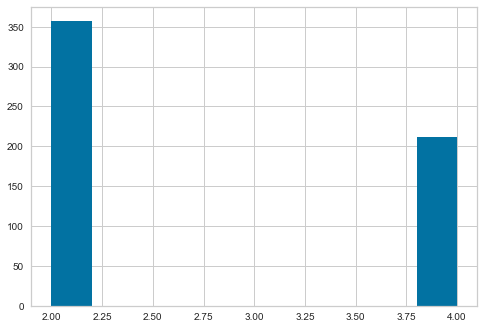

In [627]:
df['diagnosis'].hist()
# The number of benign samples is more, but still we are not on the side of imbalance data

## In each feature, we check the Largest and Smallest values to identify extreme examples

In [628]:
small = []

for col in df.columns:
    top_values = df[col].nsmallest(n=5)
    small.append(pd.DataFrame({col: top_values}).reset_index(drop=True))
pd.concat(small, axis=1)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,2,6.981,9.71,43.79,143.5,0.05263,0.01938,0.0,0.0,0.1060,0.04996,0.1115,0.3602,0.7570,6.802,0.001713,0.002252,0.0,0.0,0.007882,0.000895,7.930,12.02,50.41,185.2,0.07117,0.02729,0.0,0.0,0.1565,0.05504
1,2,7.691,10.38,47.92,170.4,0.06251,0.02344,0.0,0.0,0.1167,0.05024,0.1144,0.3621,0.7714,7.228,0.002667,0.003012,0.0,0.0,0.009539,0.000950,8.678,12.49,54.49,223.6,0.08125,0.03432,0.0,0.0,0.1566,0.05521
2,2,7.729,10.72,47.98,178.8,0.06429,0.02650,0.0,0.0,0.1203,0.05025,0.1153,0.3628,0.8439,7.254,0.002826,0.003710,0.0,0.0,0.009947,0.000968,8.952,12.87,56.65,240.1,0.08409,0.04327,0.0,0.0,0.1603,0.05525
3,2,7.760,10.82,48.34,181.0,0.06576,0.02675,0.0,0.0,0.1215,0.05044,0.1166,0.3871,0.8484,7.326,0.002838,0.003746,0.0,0.0,0.010130,0.001002,8.964,14.10,57.17,242.2,0.08484,0.04619,0.0,0.0,0.1648,0.05695
4,2,8.196,10.89,51.71,201.9,0.06613,0.03116,0.0,0.0,0.1220,0.05054,0.1186,0.3981,0.8730,8.205,0.002866,0.004660,0.0,0.0,0.010290,0.001058,9.077,14.20,57.26,248.0,0.08567,0.04712,0.0,0.0,0.1652,0.05737


In [629]:
large = []

for col in df.columns:
    top_values = df[col].nlargest(n=5)
    large.append(pd.DataFrame({col: top_values}).reset_index(drop=True))
pd.concat(large, axis=1)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,4,28.11,39.28,188.5,2501.0,0.1634,0.3454,0.4268,0.2012,0.3040,0.09744,2.873,4.885,21.98,542.2,0.03113,0.13540,0.3960,0.05279,0.07895,0.02984,36.04,49.54,251.2,4254.0,0.2226,1.0580,1.2520,0.2910,0.6638,0.2075
1,4,27.42,33.81,186.9,2499.0,0.1447,0.3114,0.4264,0.1913,0.2906,0.09575,2.547,3.896,18.65,525.6,0.02333,0.10640,0.3038,0.04090,0.06146,0.02286,33.13,47.16,229.3,3432.0,0.2184,0.9379,1.1700,0.2903,0.5774,0.1730
2,4,27.22,33.56,182.1,2250.0,0.1425,0.2867,0.4108,0.1878,0.2743,0.09502,1.509,3.647,11.07,233.0,0.02177,0.10060,0.1535,0.03927,0.05963,0.02193,33.12,45.41,220.8,3234.0,0.2098,0.9327,1.1050,0.2867,0.5558,0.1486
3,4,25.73,32.47,174.2,2010.0,0.1398,0.2839,0.3754,0.1845,0.2678,0.09296,1.370,3.568,10.12,224.1,0.02075,0.09806,0.1438,0.03487,0.05628,0.01792,32.49,44.87,214.0,3216.0,0.2006,0.8681,0.9608,0.2756,0.5440,0.1446
4,4,25.22,31.12,171.5,1878.0,0.1371,0.2832,0.3635,0.1823,0.2655,0.08980,1.296,3.120,10.05,199.7,0.01835,0.09586,0.1435,0.03441,0.05543,0.01298,31.01,42.79,211.7,3143.0,0.1909,0.8663,0.9387,0.2733,0.5166,0.1431


Text(0, 0.5, 'radius worst')

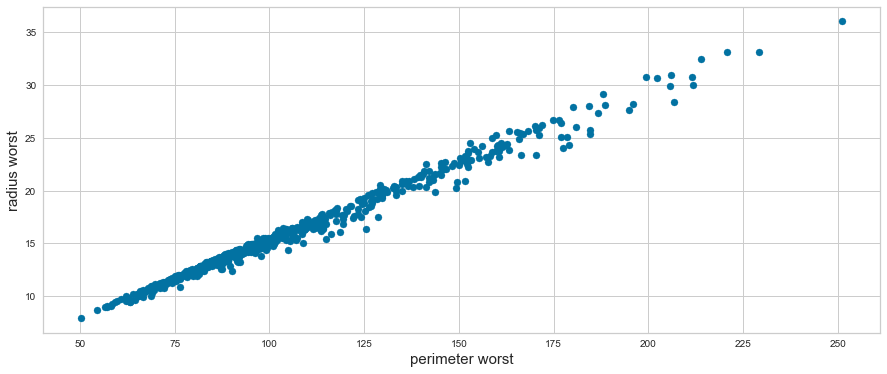

In [630]:
plt.figure(figsize=(15,6))
plt.scatter(df['perimeter_worst'],df['radius_worst'])
plt.xlabel('perimeter worst', fontsize=15)
plt.ylabel('radius worst', fontsize=15)
# A linear relationship but with a very high correlation
# With further investigations, we will decide to change these features

## In some cases, samples with a large distance from other samples cannot be considered as noise.Therefore, more investigations should be done

### We can see some examples of them in the plots below :

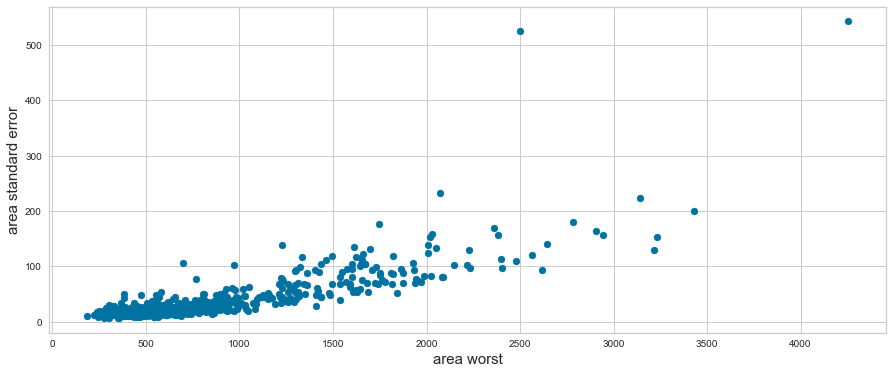

In [557]:
plt.figure(figsize=(15,6))
plt.scatter(df['area_worst'],df['area_se'])
plt.xlabel('area worst', fontsize=15)
plt.ylabel('area standard error', fontsize=15)
plt.show()

In [182]:
df[df['area_se']>400].index

Int64Index([212, 461], dtype='int64')

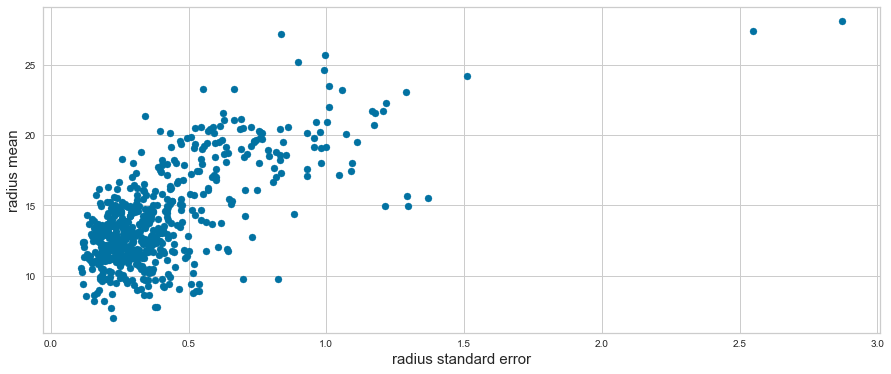

In [183]:
plt.figure(figsize=(15,6))
plt.scatter(df['radius_se'],df['radius_mean'])
plt.xlabel('radius standard error', fontsize=15)
plt.ylabel('radius mean', fontsize=15)
plt.show()

In [184]:
df[df['radius_se']>2].index

Int64Index([212, 461], dtype='int64')

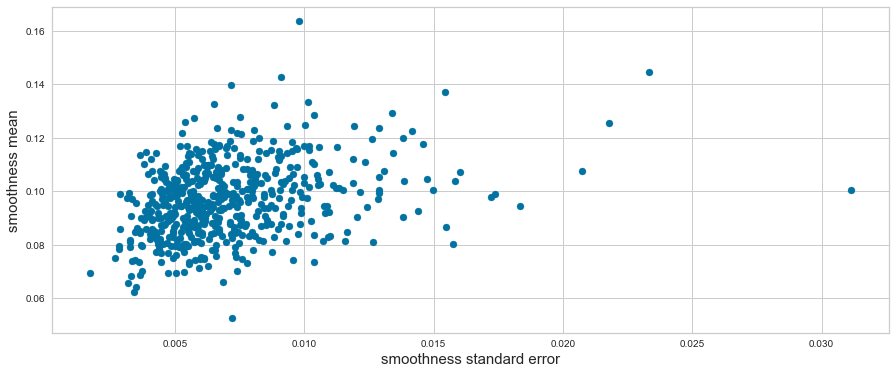

In [185]:
plt.figure(figsize=(15,6))
plt.scatter(df['smoothness_se'],df['smoothness_mean'])
plt.xlabel('smoothness standard error', fontsize=15)
plt.ylabel('smoothness mean', fontsize=15)
plt.show()

In [186]:
df[df['smoothness_se']>0.03].index

Int64Index([213], dtype='int64')

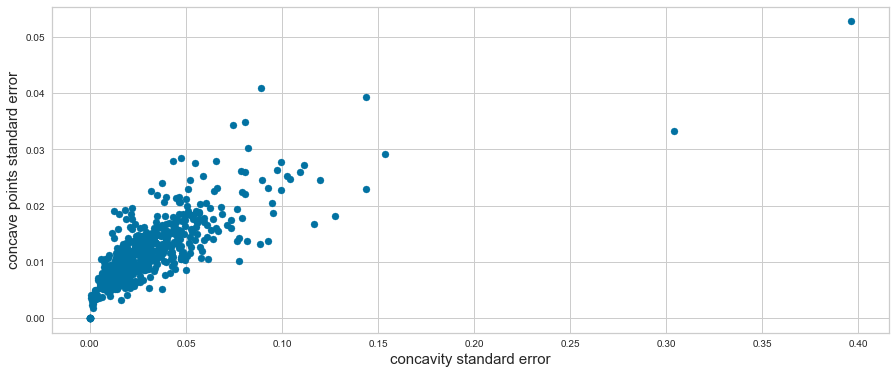

In [187]:
plt.figure(figsize=(15,6))
plt.scatter(df['concavity_se'],df['concave points_se'])
plt.xlabel('concavity standard error', fontsize=15)
plt.ylabel('concave points standard error', fontsize=15)
plt.show()

In [188]:
df[df['concavity_se']>0.3].index

Int64Index([68, 152], dtype='int64')

## First, we determine the indices of the outlier samples, then after modeling, we evaluate them individually

## index : 212 , 461 , 213 , 68 , 152

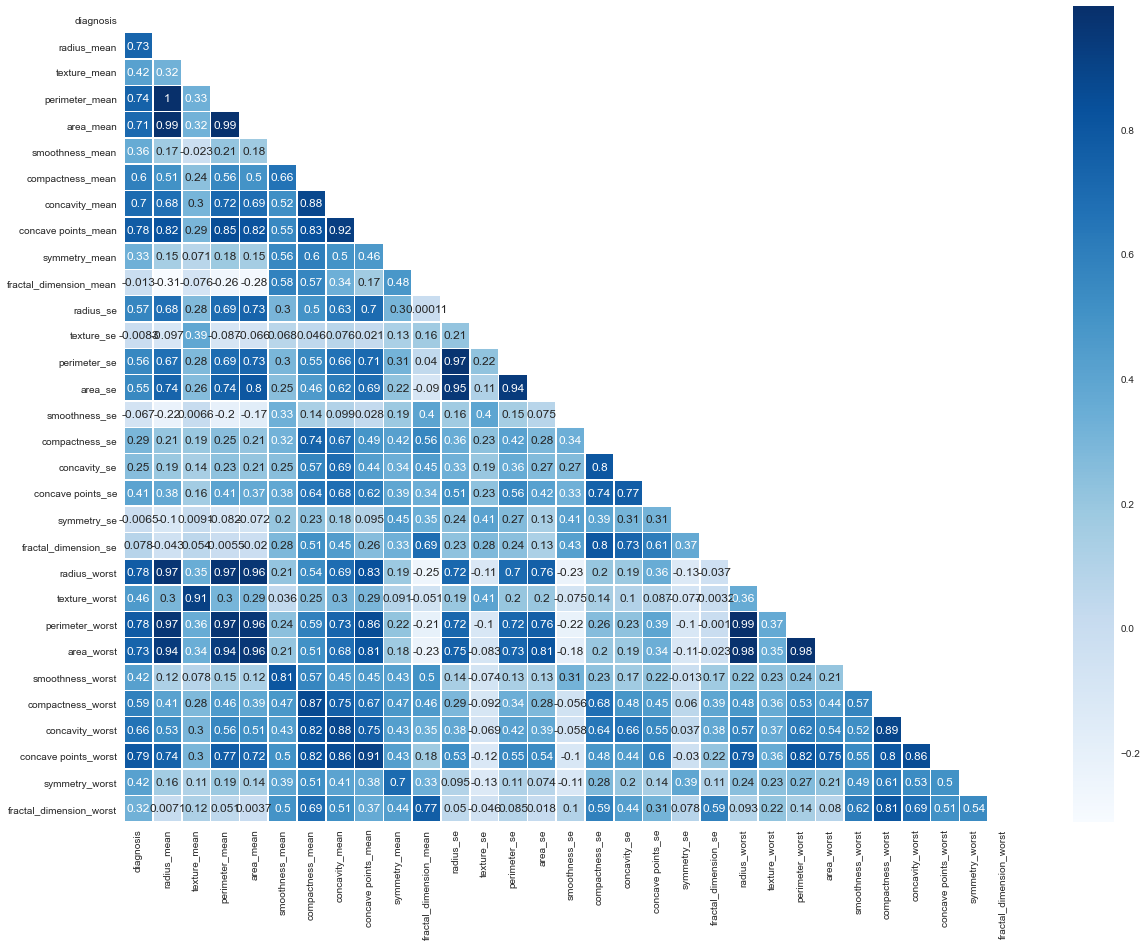

In [189]:
corr = df.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

fig , ax = plt.subplots (figsize = (20,15))
sns.heatmap (df.corr(), cmap='Blues', cbar=True, annot=True, linewidths=0.5, mask=mask)
plt.show()

## Examining the heat map plot, we notice that many features are highly correlated We have to check the relationship between these features

## This model of relationships affects the accuracy of modeling. Therefore, they should not be easily ignored

## These relationships are controlled using feature selection

In [190]:
df.corr()['diagnosis'].sort_values(ascending=False)
# radius_worst
# radius_mean

diagnosis                  1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
symmetry_se               -0

## In order to have a better preprocessing on this data model and also because of the high sensitivity of these cases, we first check the traning data

In [399]:
x = df.drop(columns=['diagnosis'])
y = df['diagnosis']
x_train , x_test , y_train , y_test = train_test_split (x,y, test_size=0.2, random_state=0)

print ('x_train :',x_train.shape,
      '\ny_train :', y_train.shape,
      '\nx_test :', x_test.shape,
      '\ny_test :', y_test.shape)

x_train : (455, 30) 
y_train : (455,) 
x_test : (114, 30) 
y_test : (114,)


In [400]:
X = x_train.copy()

X.insert (0, 'diagnosis', y_train)
X.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
338,2,10.05,17.53,64.41,310.8,0.10070,0.07326,0.02511,0.01775,0.1890,0.06331,0.2619,2.0150,1.778,16.85,0.007803,0.01449,0.01690,0.008043,0.02100,0.002778,11.16,26.84,71.98,384.0,0.1402,0.14020,0.1055,0.06499,0.2894,0.07664
427,2,10.80,21.98,68.79,359.9,0.08801,0.05743,0.03614,0.01404,0.2016,0.05977,0.3077,1.6210,2.240,20.20,0.006543,0.02148,0.02991,0.010450,0.01844,0.002690,12.76,32.04,83.69,489.5,0.1303,0.16960,0.1927,0.07485,0.2965,0.07662
406,2,16.14,14.86,104.30,800.0,0.09495,0.08501,0.05500,0.04528,0.1735,0.05875,0.2387,0.6372,1.729,21.83,0.003958,0.01246,0.01831,0.008747,0.01500,0.001621,17.71,19.58,115.90,947.9,0.1206,0.17220,0.2310,0.11290,0.2778,0.07012
96,2,12.18,17.84,77.79,451.1,0.10450,0.07057,0.02490,0.02941,0.1900,0.06635,0.3661,1.5110,2.410,24.44,0.005433,0.01179,0.01131,0.015190,0.02220,0.003408,12.83,20.92,82.14,495.2,0.1140,0.09358,0.0498,0.05882,0.2227,0.07376
490,2,12.25,22.44,78.18,466.5,0.08192,0.05200,0.01714,0.01261,0.1544,0.05976,0.2239,1.1390,1.577,18.04,0.005096,0.01205,0.00941,0.004551,0.01608,0.002399,14.17,31.99,92.74,622.9,0.1256,0.18040,0.1230,0.06335,0.3100,0.08203


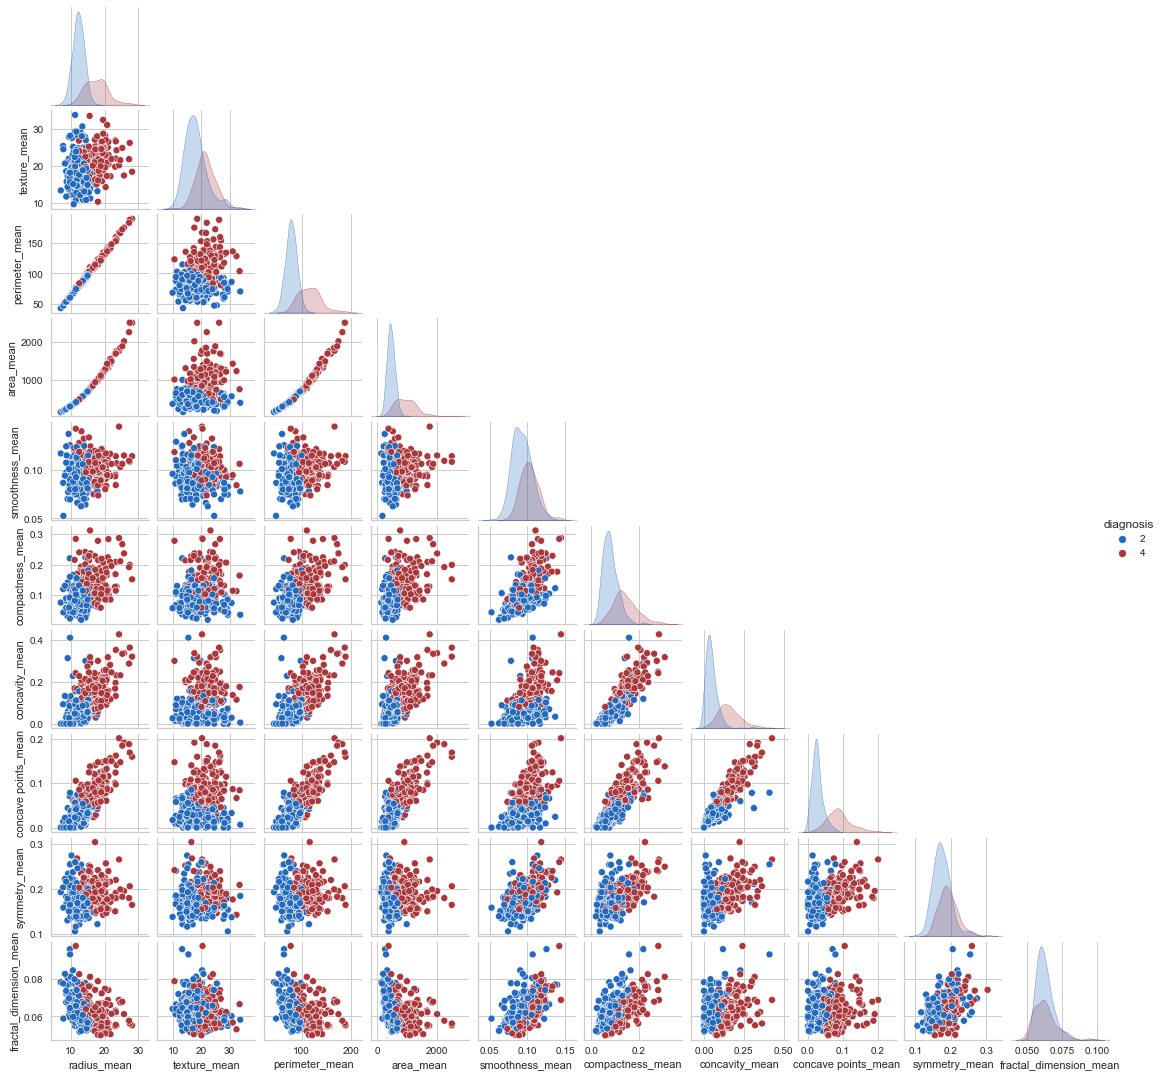

In [365]:
ploting = X.iloc[:,:11]

g=sns.pairplot(ploting, kind="scatter", hue='diagnosis', corner=True, palette='vlag')
g.fig.set_size_inches(16,15)
plt.show()

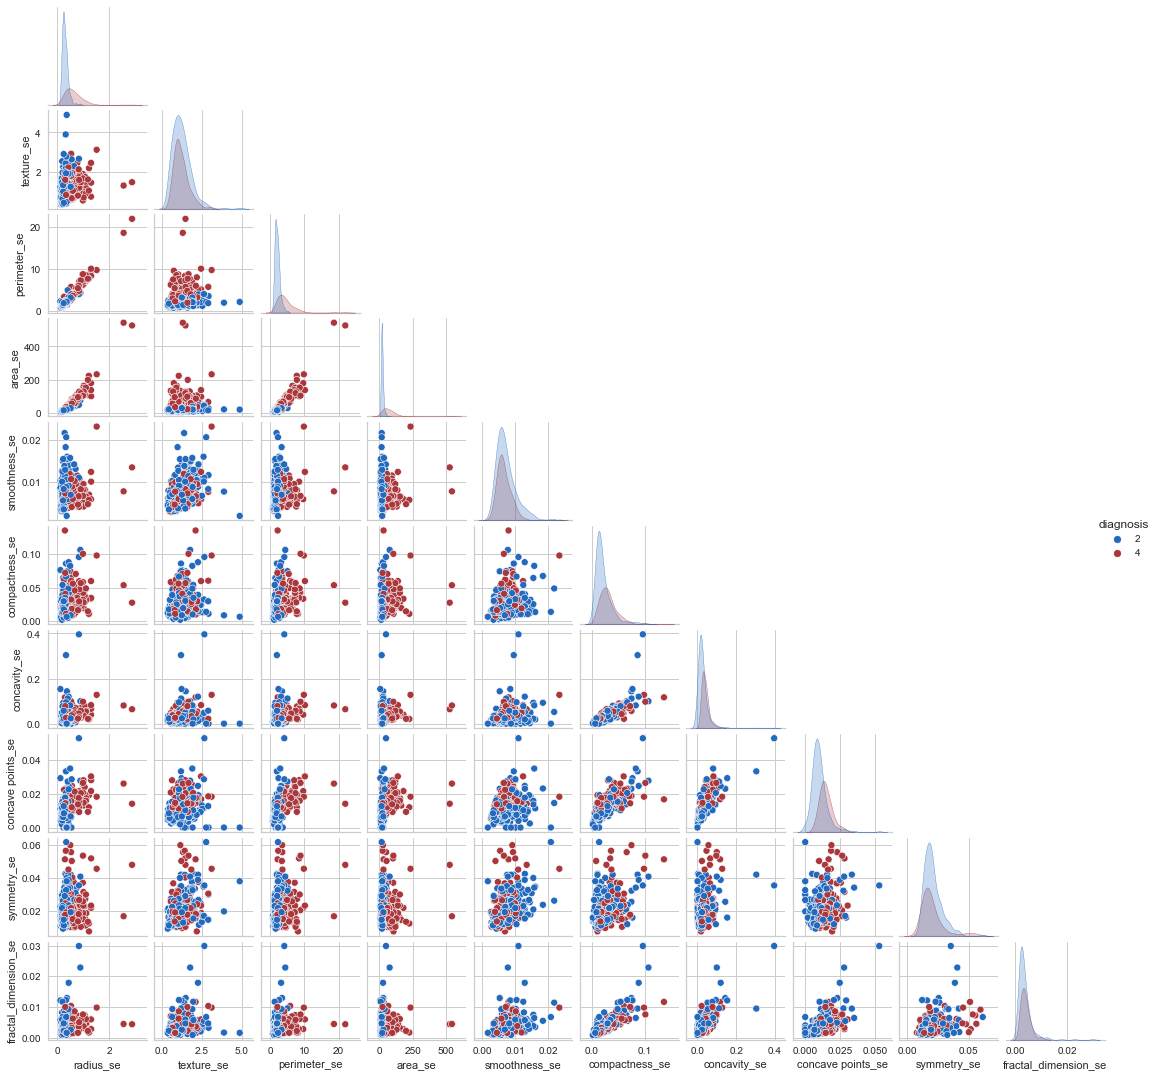

In [366]:
ploting = pd.concat([X.iloc[:,0],X.iloc[:,11:21]],axis = 1)

g=sns.pairplot(ploting, kind="scatter", hue='diagnosis', corner=True, palette='vlag')
g.fig.set_size_inches(16,15)
plt.show()

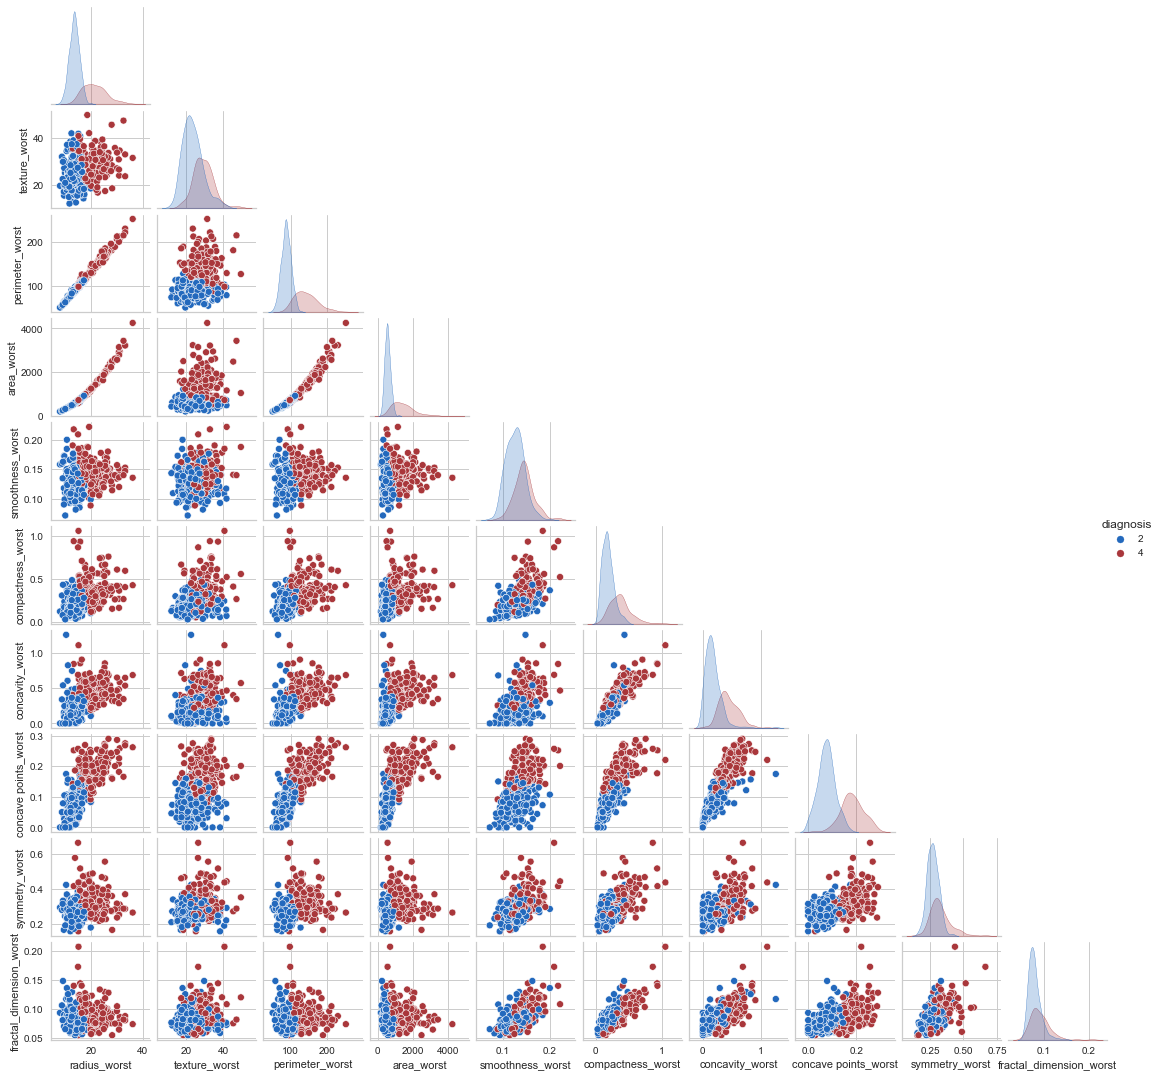

In [367]:
ploting = pd.concat([X.iloc[:,0],X.iloc[:,21:]],axis = 1)

g=sns.pairplot(ploting, kind="scatter", hue='diagnosis', corner=True, palette='vlag')
g.fig.set_size_inches(16,15)
plt.show()

In [559]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,4,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,4,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,4,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,4,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,4,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,4,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,4,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,4,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


## radius_mean, perimeter_mean,  area_mean are correlated with each other.Therefore I only choose perimeter_mean Because it is correlated with Target

In [600]:
np.corrcoef(df['radius_mean'],df['diagnosis'])[0,1]

0.7300285113754555

In [579]:
np.corrcoef(df['perimeter_mean'],df['diagnosis'])[0,1]

0.7426355297258321

In [580]:
np.corrcoef(df['area_mean'],df['diagnosis'])[0,1]

0.7089838365853891

## radius_se, perimeter_se,  area_se are correlated with each other.Therefore I only choose radius_se Because it is correlated with Target

In [586]:
np.corrcoef(df['radius_se'],df['diagnosis'])[0,1]

0.5671338208247165

In [587]:
np.corrcoef(df['perimeter_se'],df['diagnosis'])[0,1]

0.5561407034314825

In [588]:
np.corrcoef(df['area_se'],df['diagnosis'])[0,1]

0.5482359402780236

## radius_worst, perimeter_worst,  area_worst are correlated with each other.Therefore I only choose perimeter_worst Because it is correlated with Target

In [589]:
np.corrcoef(df['radius_worst'],df['diagnosis'])[0,1]

0.7764537785950386

In [590]:
np.corrcoef(df['perimeter_worst'],df['diagnosis'])[0,1]

0.7829141371737585

In [591]:
np.corrcoef(df['area_worst'],df['diagnosis'])[0,1]

0.7338250349210504

## compactness_mean, concavity_mean,  concave points_mean are correlated with each other.Therefore I only choose concave points_mean Because it is correlated with Target

In [582]:
np.corrcoef(df['compactness_mean'],df['diagnosis'])[0,1]

0.5965336775082525

In [583]:
np.corrcoef(df['concavity_mean'],df['diagnosis'])[0,1]

0.6963597071719048

In [584]:
np.corrcoef(df['concave points_mean'],df['diagnosis'])[0,1]

0.7766138400204349

## compactness_se, concavity_se,  concave points_se are correlated with each other.Therefore I only choose concave points_se Because it is correlated with Target

In [592]:
np.corrcoef(df['compactness_se'],df['diagnosis'])[0,1]

0.292999244248858

In [595]:
np.corrcoef(df['concavity_se'],df['diagnosis'])[0,1]

0.2537297659808302

In [596]:
np.corrcoef(df['concave points_se'],df['diagnosis'])[0,1]

0.40804233271650414

## compactness_worst, concavity_worst,  concave points_worst are correlated with each other.Therefore I only choose concave points_worst Because it is correlated with Target

In [597]:
np.corrcoef(df['compactness_worst'],df['diagnosis'])[0,1]

0.5909982378417914

In [598]:
np.corrcoef(df['concavity_worst'],df['diagnosis'])[0,1]

0.6596102103692325

In [599]:
np.corrcoef(df['concave points_worst'],df['diagnosis'])[0,1]

0.7935660171412687

## perimeter_mean, perimeter_worst,  area_mean are correlated with each other.Therefore I only choose perimeter_worst Because it is correlated with Target

In [617]:
np.corrcoef(df['perimeter_mean'],df['diagnosis'])[0,1]

0.7426355297258321

In [618]:
np.corrcoef(df['perimeter_worst'],df['diagnosis'])[0,1]

0.7829141371737585

In [632]:
df.drop (columns=['radius_mean','area_mean','perimeter_se','area_se','radius_worst','area_worst',
                  'compactness_mean','concavity_mean','compactness_se','concavity_se','compactness_worst','concavity_worst',
                  'perimeter_mean'],
                    inplace=True)
print(df.shape)
df.head()

(569, 18)


,diagnosis,texture_mean,smoothness_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,concave points_se,symmetry_se,fractal_dimension_se,texture_worst,perimeter_worst,smoothness_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,4,10.38,0.11840,0.14710,0.2419,0.07871,1.0950,0.9053,0.006399,0.01587,0.03003,0.006193,17.33,184.60,0.1622,0.2654,0.4601,0.11890
1,4,17.77,0.08474,0.07017,0.1812,0.05667,0.5435,0.7339,0.005225,0.01340,0.01389,0.003532,23.41,158.80,0.1238,0.1860,0.2750,0.08902
2,4,21.25,0.10960,0.12790,0.2069,0.05999,0.7456,0.7869,0.006150,0.02058,0.02250,0.004571,25.53,152.50,0.1444,0.2430,0.3613,0.08758
3,4,20.38,0.14250,0.10520,0.2597,0.09744,0.4956,1.1560,0.009110,0.01867,0.05963,0.009208,26.50,98.87,0.2098,0.2575,0.6638,0.17300
4,4,14.34,0.10030,0.10430,0.1809,0.05883,0.7572,0.7813,0.011490,0.01885,0.01756,0.005115,16.67,152.20,0.1374,0.1625,0.2364,0.07678


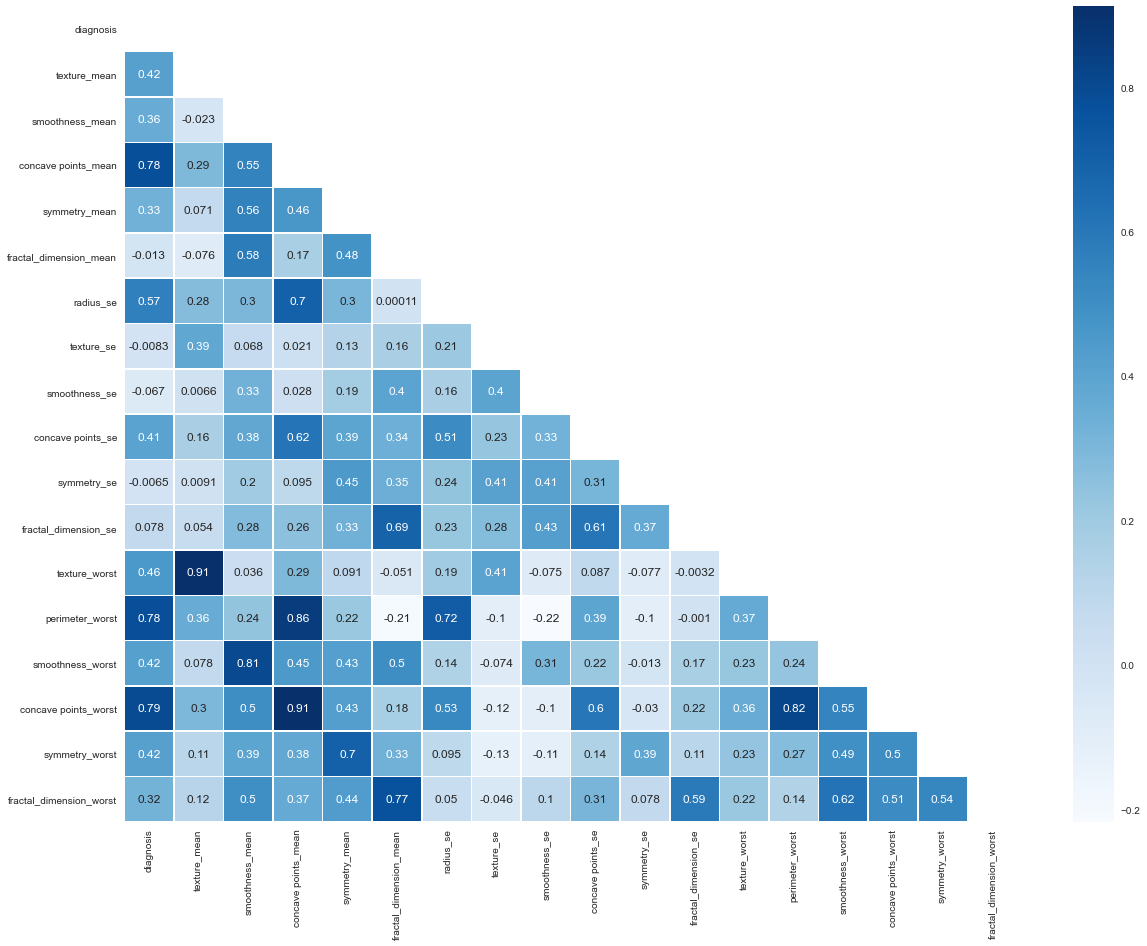

In [633]:
corr = df.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

fig , ax = plt.subplots (figsize = (20,15))
sns.heatmap (df.corr(), cmap='Blues', cbar=True, annot=True, linewidths=0.5, mask=mask)
plt.show()

## Now we start modeling with standard scaler with new features :

In [634]:
from sklearn.preprocessing import StandardScaler
stdandard_ = StandardScaler ()
df_std = pd.DataFrame (stdandard_.fit_transform (df.values), columns=df.columns)
df_std.head()

,diagnosis,texture_mean,smoothness_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,concave points_se,symmetry_se,fractal_dimension_se,texture_worst,perimeter_worst,smoothness_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.297676,-2.073335,1.568466,2.532475,2.217515,2.255747,2.489734,-0.565265,-0.214002,0.660820,1.148757,0.907083,-1.359293,2.303601,1.307686,2.296076,2.750622,1.937015
1,1.297676,-0.353632,-0.826962,0.548144,0.001392,-0.868652,0.499255,-0.876244,-0.605351,0.260162,-0.805450,-0.099444,-0.369203,1.535126,-0.375612,1.087084,-0.243890,0.281190
2,1.297676,0.456187,0.942210,2.037231,0.939685,-0.398008,1.228676,-0.780083,-0.297005,1.424827,0.237036,0.293559,-0.023974,1.347475,0.527407,1.955000,1.152255,0.201391
3,1.297676,0.253732,3.283553,1.451707,2.867383,4.910919,0.326373,-0.110409,0.689702,1.115007,4.732680,2.047511,0.133984,-0.249939,3.394275,2.175786,6.046041,4.935010
4,1.297676,-1.151816,0.280372,1.428493,-0.009560,-0.562450,1.270543,-0.790244,1.483067,1.144205,-0.361092,0.499328,-1.466770,1.338539,0.220556,0.729259,-0.868353,-0.397100


In [635]:
x = df_std.drop(columns=['diagnosis'])
y = df['diagnosis']

# LogisticRegression

In [636]:
from sklearn.linear_model import LogisticRegression

In [637]:
def Logreg (x,y,param) :
    df_testsize = pd.DataFrame ()

    for c in param :
        x_train , x_test , y_train , y_test = train_test_split (x,y, test_size=0.2, random_state=0)
        logreg = LogisticRegression(C=c, class_weight='balanced')
        logreg.fit(x_train,y_train)
        y_pred = logreg.predict(x_test)
        dict = {'C': c, 'Accuracy': metrics.accuracy_score (y_test,y_pred)}
        df_testsize = df_testsize.append(dict, ignore_index=True)
    return (x_train , x_test , y_train , y_test, y_pred, df_testsize)

def highlight_max (s) :
    is_max = s == s.max()
    return ['background-color : yellow' if v else '' for v in is_max]

In [638]:
x_train , x_test , y_train , y_test, y_pred , df_testsize = Logreg (x,y,
                        [0.001, 0.01, 0.1, 1, 10, 100, 1000])

df_testsize.style.apply (highlight_max)

,Accuracy,C
0,0.929825,0.001000
1,0.956140,0.010000
2,0.956140,0.100000
3,0.956140,1.000000
4,0.956140,10.000000
5,0.947368,100.000000
6,0.947368,1000.000000


## The Best Score is 0.956140
## Improved model With Crossvalidation :

In [639]:
from sklearn.model_selection import cross_val_score

In [640]:
k = 5
print(cross_val_score(LogisticRegression(C=1, class_weight='balanced'), x,y, cv=k))
print('\nAverage of Crossvalidation is :','\n',
      cross_val_score(LogisticRegression(C=1, class_weight='balanced'), x,y, cv=k).mean())

[0.96491228 0.98245614 0.97368421 0.95614035 0.96460177]

Average of Crossvalidation is : 
 0.9683589504735289


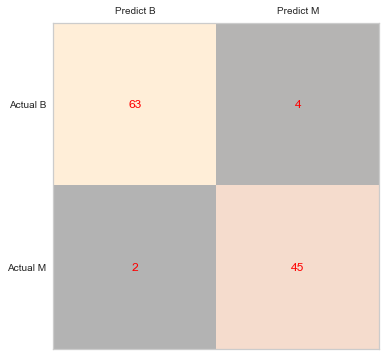

In [641]:
cm = confusion_matrix (y_test,y_pred)

fig , ax = plt.subplots(figsize=(6,6))
#ax.imshow(cm)
ax.matshow(cm, cmap='copper', alpha=0.3)

#plt.cm.Reds
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Predict B', 'Predict M'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Actual B', 'Actual M'))
ax.set_ylim(1.5,-0.5)
for i in range(2):
    for j in range(2):
        ax.text(j,i, cm[i,j], ha='center', va='center', color='red')
plt.show()

In [642]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           2       0.97      0.94      0.95        67
           4       0.92      0.96      0.94        47

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.95       114
weighted avg       0.95      0.95      0.95       114



#### With this accuracy that we obtained, the model predicted wrongly in 6 cases
#### But we need to use other models to find out which one works best

# K Nearest Neighbor

In [643]:
from sklearn.neighbors import KNeighborsClassifier

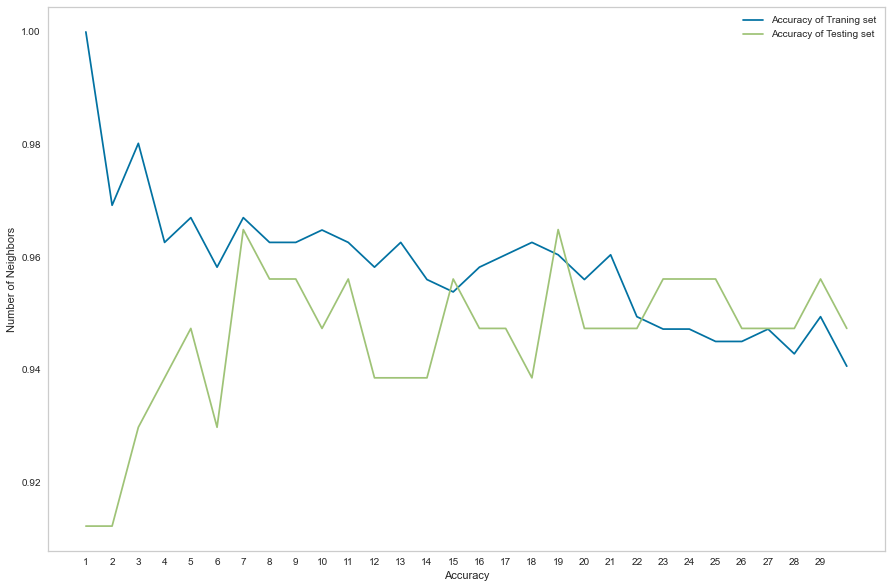

In [644]:
train_acc = []
test_acc = []
number_k = range(1,31)
for K in number_k :
    x_train , x_test , y_train , y_test = train_test_split (x,y, test_size=0.2, random_state=0)
    knn = KNeighborsClassifier(K)
    knn.fit(x_train,y_train.ravel())
    train_acc.append (knn.score(x_train,y_train))
    test_acc.append (knn.score(x_test,y_test))

plt.figure(figsize=(15,10))
plt.plot(number_k,train_acc, label='Accuracy of Traning set')
plt.plot(number_k,test_acc, label='Accuracy of Testing set')
plt.xlabel('Accuracy')
plt.ylabel('Number of Neighbors')
plt.xticks(range(1,30))
plt.grid()
plt.legend()

In [645]:
# best number of k is : 8
k=8
knn = KNeighborsClassifier (k)
knn.fit (x_train,y_train.ravel())
y_pred = knn.predict (x_test)
print('Accuracy:', metrics.accuracy_score (y_test,y_pred))

Accuracy: 0.956140350877193


In [646]:
c=5
print(cross_val_score(knn, x,y, cv=c))
print('\nAverage of Crossvalidation is :','\n',
      cross_val_score(knn, x,y, cv=c).mean())

[0.97368421 0.95614035 0.94736842 0.93859649 0.92920354]

Average of Crossvalidation is : 
 0.9489986027014439


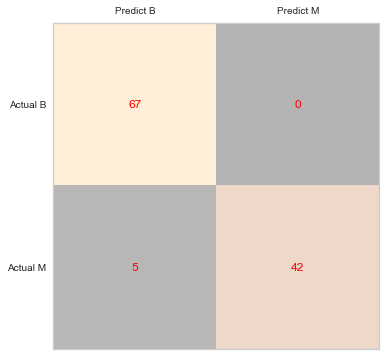

In [647]:
cm = confusion_matrix (y_test,y_pred)

fig , ax = plt.subplots(figsize=(6,6))
#ax.imshow(cm)
ax.matshow(cm, cmap='copper', alpha=0.3)

#plt.cm.Reds
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Predict B', 'Predict M'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Actual B', 'Actual M'))
ax.set_ylim(1.5,-0.5)
for i in range(2):
    for j in range(2):
        ax.text(j,i, cm[i,j], ha='center', va='center', color='red')
plt.show()

In [648]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           2       0.93      1.00      0.96        67
           4       1.00      0.89      0.94        47

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



### Now, the change that has been made is that in cases where the patient is actually malignant, the model mistakenly diagnoses it as benign, and this is not good!!!

# DecisionTree

In [649]:
from sklearn.tree import DecisionTreeClassifier

In [650]:
def DTs (x,y,Criterion,Max_depth) :
    df_testsize = pd.DataFrame ()
    for c in Criterion :
        for m in Max_depth :
            x_train , x_test , y_train , y_test = train_test_split (x,y, test_size=0.2, random_state=0)
            DTs = DecisionTreeClassifier(max_depth=m, criterion=c ,random_state =0)
            DTs.fit(x_train,y_train)
            y_pred = DTs.predict(x_test)
            dict = {'criterion':c, 'max_depth':m, 'Accuracy': metrics.accuracy_score (y_test,y_pred)}
            df_testsize = df_testsize.append(dict, ignore_index=True)
    return (x_train , x_test , y_train , y_test, y_pred, df_testsize)

def highlight_max (s) :
    is_max = s == s.max()
    return ['background-color : yellow' if v else '' for v in is_max]

In [651]:
x_train , x_test , y_train , y_test, y_pred , df_testsize = DTs (x,y,
                        ['entropy','gini'],
                        [2,3,4,5,6,7,8,9,10])

df_testsize.style.apply (highlight_max)

,Accuracy,criterion,max_depth
0,0.921053,entropy,2.000000
1,0.947368,entropy,3.000000
2,0.938596,entropy,4.000000
3,0.921053,entropy,5.000000
4,0.921053,entropy,6.000000
5,0.912281,entropy,7.000000
6,0.912281,entropy,8.000000
7,0.912281,entropy,9.000000
8,0.912281,entropy,10.000000
9,0.921053,gini,2.000000


In [652]:
# Parameters of the best score is : criterion > entropy and max_depth > 3
DT = DecisionTreeClassifier(max_depth=3, criterion='entropy',random_state =0)
DT.fit(x_train,y_train)
pred = DT.predict(x_test)
print('Accuracy:', metrics.accuracy_score (y_test,pred))

Accuracy: 0.9473684210526315


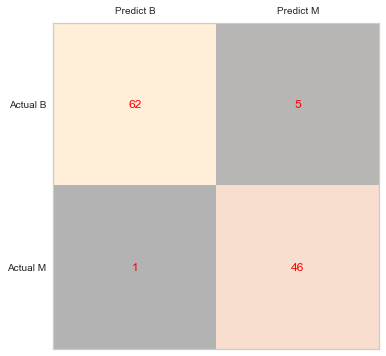

In [653]:
cm = confusion_matrix (y_test,pred)

fig , ax = plt.subplots(figsize=(6,6))
#ax.imshow(cm)
ax.matshow(cm, cmap='copper', alpha=0.3)

#plt.cm.Reds
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Predict B', 'Predict M'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Actual B', 'Actual M'))
ax.set_ylim(1.5,-0.5)
for i in range(2):
    for j in range(2):
        ax.text(j,i, cm[i,j], ha='center', va='center', color='red')
plt.show()

In [654]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           2       0.98      0.93      0.95        67
           4       0.90      0.98      0.94        47

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.95       114
weighted avg       0.95      0.95      0.95       114



### Now the model has performed better and the false negative error has reached its lowest level   But we have to test other models

# RandomForest

In [655]:
from sklearn.ensemble import RandomForestClassifier

In [656]:
def RandomForest (x,y,estimator) :
    df_testsize = pd.DataFrame ()
    for n in estimator :
        x_train , x_test , y_train , y_test = train_test_split (x,y, test_size=0.2, random_state=0)
        RF = RandomForestClassifier(n_estimators=n, max_depth=3, criterion='entropy', random_state =0)
        RF.fit(x_train,y_train)
        y_pred = RF.predict(x_test)
        dict = {'n_estimators':n, 'Accuracy': metrics.accuracy_score (y_test,y_pred)}
        df_testsize = df_testsize.append(dict, ignore_index=True)
    return (x_train , x_test , y_train , y_test, y_pred, df_testsize)

def highlight_max (s) :
    is_max = s == s.max()
    return ['background-color : yellow' if v else '' for v in is_max]

In [657]:
x_train , x_test , y_train , y_test, y_pred , df_testsize = RandomForest (x,y,
                        [10,25,50,100,200,300,500])

df_testsize.style.apply (highlight_max)

,Accuracy,n_estimators
0,0.964912,10.000000
1,0.956140,25.000000
2,0.956140,50.000000
3,0.956140,100.000000
4,0.947368,200.000000
5,0.947368,300.000000
6,0.956140,500.000000


In [658]:
RF = RandomForestClassifier(n_estimators=25, max_depth=3, criterion='entropy', random_state =0)
RF.fit(x_train,y_train)
pred = RF.predict(x_test)
print('Accuracy:', metrics.accuracy_score (y_test,y_pred))

Accuracy: 0.956140350877193


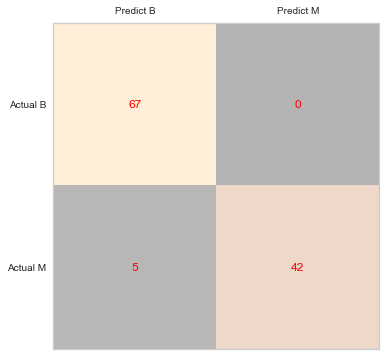

In [659]:
cm = confusion_matrix (y_test,y_pred)

fig , ax = plt.subplots(figsize=(6,6))
#ax.imshow(cm)
ax.matshow(cm, cmap='copper', alpha=0.3)

#plt.cm.Reds
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Predict B', 'Predict M'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Actual B', 'Actual M'))
ax.set_ylim(1.5,-0.5)
for i in range(2):
    for j in range(2):
        ax.text(j,i, cm[i,j], ha='center', va='center', color='red')
plt.show()

In [660]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           2       0.93      1.00      0.96        67
           4       1.00      0.89      0.94        47

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



### The random forest with almost similar accuracy but with the highest false negative value on this data did not perform as well as the previous algorithms

# Support Vector Machine (SVM)

In [661]:
from sklearn.svm import SVC

In [671]:
def SVM (x,y,Kernel) :
    df_testsize = pd.DataFrame ()
    for k in Kernel :
        x_train , x_test , y_train , y_test = train_test_split (x,y, test_size=0.2, random_state=0)
        svm = SVC(kernel=k,random_state=0)
        svm.fit(x_train,y_train)
        y_pred = svm.predict(x_test)
        dict = {'kernel':k, 'Accuracy': metrics.accuracy_score (y_test,y_pred)}
        df_testsize = df_testsize.append(dict, ignore_index=True)
    return (x_train , x_test , y_train , y_test, y_pred, df_testsize)

def highlight_max (s) :
    is_max = s == s.max()
    return ['background-color : yellow' if v else '' for v in is_max]

In [672]:
x_train , x_test , y_train , y_test, y_pred , df_testsize = SVM (x,y,
                        ['linear','poly', 'rbf', 'sigmoid'])

df_testsize.style.apply (highlight_max)

,Accuracy,kernel
0,0.947368,linear
1,0.903509,poly
2,0.964912,rbf
3,0.903509,sigmoid


In [673]:
svm = SVC(kernel='rbf',random_state=0)
svm.fit(x_train,y_train)
y_pred = svm.predict(x_test)
print('Accuracy:', metrics.accuracy_score (y_test,y_pred))

Accuracy: 0.9649122807017544


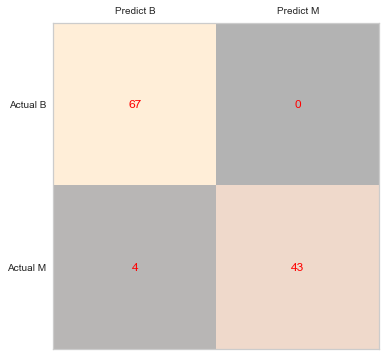

In [674]:
cm = confusion_matrix (y_test,y_pred)

fig , ax = plt.subplots(figsize=(6,6))
#ax.imshow(cm)
ax.matshow(cm, cmap='copper', alpha=0.3)

#plt.cm.Reds
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Predict B', 'Predict M'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Actual B', 'Actual M'))
ax.set_ylim(1.5,-0.5)
for i in range(2):
    for j in range(2):
        ax.text(j,i, cm[i,j], ha='center', va='center', color='red')
plt.show()

In [675]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           2       0.94      1.00      0.97        67
           4       1.00      0.91      0.96        47

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



### svm could not perform as well as the previous algorithms Although though it had the highest accuracy

## Now we test the data of the outlayer data :

#### index : 212 , 461 , 213 , 68 , 152

In [695]:
df_pred = pd.DataFrame(df_std, index=[212,461,213,68,152])
df_pred = df_new.drop('diagnosis', axis=1)

In [696]:
Pred = DT.predict(df_pred)
Pred

array([4, 4, 4, 2, 2], dtype=int64)

In [697]:
df_new = pd.DataFrame(df, index=[212,461,213,68,152])
df2 = pd.DataFrame ({'Actual': df_new.diagnosis, 'Predict': Pred.flatten()})
df2

,Actual,Predict
212,4,4
461,4,4
213,4,4
68,2,2
152,2,2


# Great . It couldn't have been better than this